In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
dataset_url = "https://raw.githubusercontent.com/apogiatzis/breast-cancer-azure-ml-notebook/master/breast-cancer-data.csv"
dataset = pd.read_csv(dataset_url)

In [3]:
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})
dataset.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [5]:
X = dataset.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
y = dataset.diagnosis.values

In [6]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [7]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
#pca = PCA(0.9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [9]:
explained_variance = pca.explained_variance_ratio_

In [10]:
explained_variance

array([0.99363095, 0.00615281])

In [11]:
#Training the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [12]:
#Prediction part
y_pred = classifier.predict(X_test)

In [13]:
#Making a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[63  4]
 [10 37]]


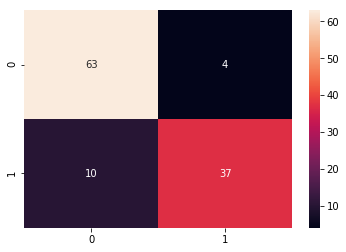

In [14]:
sns.heatmap(cm, annot=True)

In [15]:
print('Accuracy: ' +str(accuracy_score(y_test, y_pred)))

Accuracy: 0.8771929824561403


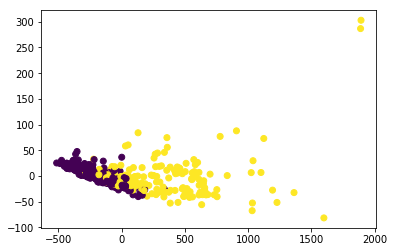

In [16]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train) 
plt.show() 